In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [3]:
from robustsp.LocationScale.MscaleTUK import *
from robustsp.LocationScale.MscaleHUB import *
from robustsp.AuxiliaryFunctions.madn import madn

In [4]:
# fix seed of random number generator for reproducibility
random.seed(2)

# Number of measurements
N = 100

# DC voltage in AWGN
# x_N_minus1 = np.random.randn(N-1,1)+5 . Not sure if matlab
# uses same rng as python, thus load matlab generated samples for better
# reproducibility
x_N_minus1 = scipy.io.loadmat('x_N_minus1.mat',struct_as_record=False)
x_N_minus1 = x_N_minus1['x_N_minus1']

# outlier values
delta_x = np.linspace(0,10,1000)

mat = scipy.io.loadmat('delta_x.mat',struct_as_record=False)
a=np.around(mat['delta_x'][0], decimals=8)
b=np.around(delta_x, decimals=8)
np.array_equal(a,b)

True

In [5]:
# sensitivity curve for standard deviation
SC_std = np.zeros(delta_x.shape)
std_hat = np.std(x_N_minus1, ddof=1) # 1.0551

for ii in range(len(delta_x)):
    SC_std[ii] = N*(np.std(np.append(x_N_minus1,delta_x[ii]), ddof=1) 
                     - std_hat)
    
mat = scipy.io.loadmat('SC_Std.mat',struct_as_record=False)
a=np.around(mat['SC_std'][0], decimals=8)
b=np.around(SC_std, decimals=8)
np.array_equal(a,b)


True

In [6]:
# sensitivity curve for median absolute deviation
# that does not coverge to IF
SC_mad = np.zeros(delta_x.shape)
std_hat = madn(x_N_minus1) # 0.8319

for ii in range(len(delta_x)):
    SC_mad[ii] = N*(madn(np.append(x_N_minus1,delta_x[ii])) 
                     - std_hat) 

mat = scipy.io.loadmat('SC_mad.mat',struct_as_record=False)
a=np.around(mat['SC_mad'][0], decimals=8)
b=np.around(SC_mad, decimals=8)
np.array_equal(a,b)  

True

In [7]:
# Sensitivity Curve for mean absolute deviation
# around the median
SC_mead = np.zeros(delta_x.shape)
std_hat = np.mean(np.abs(x_N_minus1-np.median(x_N_minus1))) # 0.7859

for ii in range(len(delta_x)):
    SC_mead[ii] = N*(np.mean(np.abs(np.append(x_N_minus1, delta_x[ii])
                                         -np.median(x_N_minus1)))
                     -std_hat)

mat = scipy.io.loadmat('SC_mead.mat',struct_as_record=False)
a=np.around(mat['SC_mead'][0], decimals=8)
b=np.around(SC_mead, decimals=8)
np.array_equal(a,b)

True

In [9]:
# Sensitivity Curve for Huber's scale estimate
c =  1.3415 # unnecessary
SC_hub = np.zeros(len(delta_x))
std_hat = MscaleHUB(x_N_minus1,c,path='u.mat')
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(MscaleHUB(np.append(x_N_minus1, delta_x[ii]),c,path='u.mat')
                    -std_hat)

mat = scipy.io.loadmat('SC_hub.mat',struct_as_record=False)
a=np.around(mat['SC_hub'][0], decimals=8)
b=np.around(SC_hub, decimals=8)
print(np.array_equal(a,b))

False


In [10]:
# Sensitivity Curve for Tukey's scale estimate
c = 4.68 
SC_tuk = np.zeros(delta_x.shape)
std_hat = MscaleTUK(x_N_minus1,c,path='u.mat') # Soll: 0.8772

for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(MscaleTUK(np.append(x_N_minus1, delta_x[ii]),c,path='u.mat')-std_hat)
    
mat = scipy.io.loadmat('SC_tuk.mat',struct_as_record=False)
a=np.around(mat['SC_tuk'][0], decimals=8)
b=np.around(SC_tuk, decimals=8)
print(np.array_equal(a,b))

0.8771804912877513
False


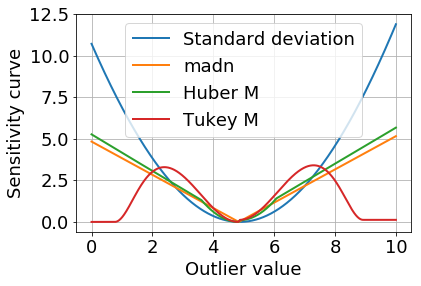

In [11]:
plt.rcParams.update({'font.size': 18})

plt.plot(delta_x,SC_std-np.amin(SC_std), label ='Standard deviation', linewidth=2)
plt.plot(delta_x,SC_mead-np.amin(SC_mead), label='madn', linewidth=2)
plt.plot(delta_x,SC_hub-np.amin(SC_hub), label='Huber M', linewidth=2)
plt.plot(delta_x,SC_tuk-np.amin(SC_tuk), label ='Tukey M', linewidth=2)

plt.grid(True)

plt.xlabel('Outlier value')
plt.ylabel('Sensitivity curve')
plt.legend()

plt.show()